# 2D PCA  for title clusters

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# local
import set_path
import supp.support_load as lp
import supp.support_get_mapping as gm

In [2]:
folder = r'data/'
file_name = 'person_title_cluster_pivot.csv'

In [3]:
folder_save = 'img/plots_PCA_of_titles/'
# Check if 'img' directory exists, if not, create it
if not os.path.exists(folder_save.split('/')[0]):
    os.makedirs(folder_save.split('/')[0])
# Check if 'plots' directory exists within 'img', if not, create it
if not os.path.exists(folder_save[:-1]):
    os.makedirs(folder_save[:-1])

In [4]:
data = lp.read_csv(file_name, folder=folder, index_col='ID_person')
data.head()

,administration,epithet,family,priest,privy,rank,worker
ID_person,,,,,,,
1,7,3,0,4,4,4,1
2,1,1,1,1,1,2,0
4,0,2,0,4,4,1,2
5,0,2,0,3,3,1,1
6,0,4,1,1,0,2,0


In [5]:
data.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.528370,0.411888,0.316722,0.564395,0.160612,0.475233,0.121585
std,1.292397,0.857556,0.465268,0.783642,0.562884,0.692453,0.346479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,13.000000,6.000000,1.000000,8.000000,6.000000,5.000000,3.000000


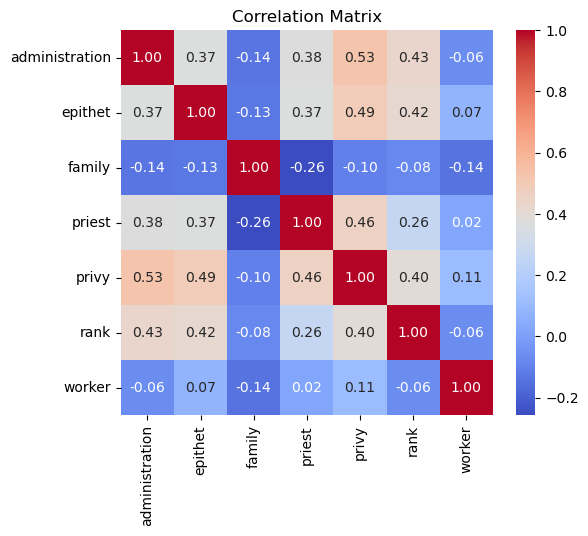

In [6]:
# Assuming your DataFrame is named df
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

PCA

In [7]:
# Initialize PCA with 2 components
pca = PCA(n_components=7)
# Fit PCA to your data
pca.fit(data)
# Transform the data into the new 2-dimensional space
X_7d = pca.transform(data)
 # Convert the transformed data into a DataFrame
X_7d = pd.DataFrame(X_7d)

In [8]:
pca.singular_values_

array([86.60270685, 47.13014579, 38.48047298, 32.14398223, 26.05994133,
       23.89418967, 18.51962448])

In [9]:
eigenvalues = []
n_max = 10
for scale in range(1, n_max + 1):
    data2 = data.copy()
    data2.loc[:, 'privy'] = data2.loc[:, 'privy'] * scale
    # Initialize PCA with 2 components
    pca = PCA(n_components=7)
    # Fit PCA to your data
    pca.fit(data2)
    eigenvalues.append(pca.singular_values_)
pd.DataFrame(np.array(eigenvalues).round(4),
             index= [f'scaled by {i}' for i in range(1, n_max+1)],
             columns=[f'$\lambda_{i}$' for i in range(1, data.shape[1]+1)])

,$\lambda_1$,$\lambda_2$,$\lambda_3$,$\lambda_4$,$\lambda_5$,$\lambda_6$,$\lambda_7$
scaled by 1,86.6027,47.1301,38.4805,32.1440,26.0599,23.8942,18.5196
scaled by 2,96.6428,50.4114,40.1010,38.0872,32.1424,25.7498,18.9066
scaled by 3,116.5020,57.1834,43.5812,38.3577,32.1428,25.7628,18.9390
scaled by 4,142.9405,61.1035,44.2686,38.3785,32.1429,25.7663,18.9490
scaled by 5,172.2456,63.0130,44.5086,38.3855,32.1429,25.7678,18.9534
scaled by 6,202.8137,64.0393,44.6227,38.3887,32.1429,25.7686,18.9557
scaled by 7,234.0193,64.6484,44.6865,38.3906,32.1429,25.7690,18.9571
scaled by 8,265.5878,65.0384,44.7262,38.3917,32.1429,25.7693,18.9580
scaled by 9,297.3822,65.3031,44.7525,38.3925,32.1429,25.7695,18.9586
scaled by 10,329.3270,65.4909,44.7710,38.3930,32.1429,25.7697,18.9591


In [11]:
eigenvalues = []
n_max = 10
for scale in range(1, n_max + 1):
    data2 = data.copy()
    data2.loc[:, 'privy'] = data2.loc[:, 'privy'] * scale
    # Initialize PCA with 2 components
    pca = PCA(n_components=7)
    # Fit PCA to your data
    pca.fit(data2)
    eigenvalues.append(pca.singular_values_/pca.singular_values_[0])
pd.DataFrame(np.array(eigenvalues).round(4),
             index= [f'scaled by {i}' for i in range(1, n_max+1)],
             columns=[f'$\lambda_{i}$' for i in range(1, data.shape[1]+1)])

,$\lambda_1$,$\lambda_2$,$\lambda_3$,$\lambda_4$,$\lambda_5$,$\lambda_6$,$\lambda_7$
scaled by 1,1.0,0.5442,0.4443,0.3712,0.3009,0.2759,0.2138
scaled by 2,1.0,0.5216,0.4149,0.3941,0.3326,0.2664,0.1956
scaled by 3,1.0,0.4908,0.3741,0.3292,0.2759,0.2211,0.1626
scaled by 4,1.0,0.4275,0.3097,0.2685,0.2249,0.1803,0.1326
scaled by 5,1.0,0.3658,0.2584,0.2229,0.1866,0.1496,0.1100
scaled by 6,1.0,0.3158,0.2200,0.1893,0.1585,0.1271,0.0935
scaled by 7,1.0,0.2763,0.1910,0.1640,0.1374,0.1101,0.0810
scaled by 8,1.0,0.2449,0.1684,0.1446,0.1210,0.0970,0.0714
scaled by 9,1.0,0.2196,0.1505,0.1291,0.1081,0.0867,0.0638
scaled by 10,1.0,0.1989,0.1359,0.1166,0.0976,0.0782,0.0576
